In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

### 현재 코드에서는, 20분 간격으로 레이블을 지정해주고, 한번에 그린 케이스

In [ ]:
# Define the path
path = 'D:\\MultiModal\\Face_z_score\\C_1\\'
save_path = 'D:\\MultiModal\\Face_z_score\\CC_plot\\'
if not os.path.exists(save_path):
    os.makedirs(save_path) 

# Define the lists
weeks = ['1W','2W','3W','4W']  # '2W', '3W', '4W'
steps = ['S1']  # 'S2' 'S3'
people = ['C1', 'C2', 'C3', 'C4']

fps = 25  # Frames per second

for week in weeks:
    for step in steps:
        
        temp = {}
        
        for person in people:
            file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
            if os.path.exists(file_path):
                df = pd.read_excel(file_path, index_col=0)
                
                df['box.size'] = df['box.height'] * df['box.width']
                # data sampling, 500번째에 찍기 
                #df = df.iloc[::500, :]
                df.index = pd.to_timedelta(df.index / fps, unit='s')  # Convert index to timedelta format based on fps
                df.index = df.index.astype(str).str.split(' ').str[-1]  # Convert timedelta to string and keep only the time part
                temp[person] = df

        # 플롯의 사이즈 조절
        plt.figure(figsize=(20, 10))

        for person in people:
            if person in temp:
                df = temp[person]
                plt.plot(df.index, df['box.size'], label=person)

        plt.xlabel('Time')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        
        
        # 시간을 매 10초씩 보여줄 수 있도록 세팅하는 부분.
        ax = plt.gca() # 현재 축 정보를 가져옴; 
        tick_labels = ax.get_xticklabels() # 현재 x축의 모든 레이블을 가져옴.
        tick_labels_to_keep = [tick_labels[i] for i in range(0, len(tick_labels), int(fps*20))] # 리스트를 하나 생성하고, 20초 간격으로 x축 정보를 설정함.
        ax.set_xticks(ax.get_xticks()[::int(fps*20)]) # x축 틱 정보를 20초 간격으로 설정함. 
        ax.set_xticklabels(tick_labels_to_keep) # 앞에서 설정한 x tick 정보를 넣어줌.
        
        # y축의 경우, box size로 유지.
        plt.ylabel('Box Size')
        plt.title(f'{week}_{step} graph')
        plt.legend()

        # Adjust layout to give more space for the x-axis labels
        plt.subplots_adjust(bottom=0.5)

        # Show the plot
        plt.show()
        
        # # Save the plot to the specified path
        # plot_filename = f"{week}_{step}_graph.png"
        # plot_filepath = os.path.join(save_path, plot_filename)
        # plt.savefig(plot_filepath)
        # plt.close()  # Close the plot to avoid display

### 지금 코드에서는 위의 그래프 시간 중, 첨예하게 잘라서 데이터가 잘 있는지 확인해볼 것.

In [ ]:
path = 'D:\\MultiModal\\Face_z_score\\C_1\\'
save_path = 'D:\\MultiModal\\Face_z_score\\1min_plot_C\\'
if not os.path.exists(save_path):
    os.makedirs(save_path) 

# Define the lists
weeks = ['1W','2W','3W','4W']  # '2W', '3W', '4W'
steps = ['S1', 'S2']  # 'S2', 'S3'
people = ['C1', 'C2', 'C3', 'C4']

fps = 25  
time_intervals = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10),
                  (10,11), (11,12), (12,13), (13, 14), (14,15), (15,16), (16,17), (17,18), (18,19), (19,20)]  
# 원하는 시간 간격으로 나누어서, 그래프를 출력해볼 수 있는 부분. || 분 간격 

# time_intervals = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]

for week in weeks:
    for step in steps:
        temp = {} # 빈 딕셔너리 생성, => 각 그룹별로 나누어 한번에 그릴 수 있도록 하기 위해서. 
        
        for person in people:
            file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
            if os.path.exists(file_path):
                df = pd.read_excel(file_path, index_col=0)
                
                df['box.size'] = df['box.height'] * df['box.width']
                df.index = pd.to_timedelta(df.index / fps, unit='s')  # Convert index to timedelta format based on fps
                df.index = df.index.astype(str).str.split(' ').str[-1]  # Convert timedelta to string and keep only the time part
                temp[person] = df

        # ~분부터 ~분까지 그릴 수 있도록 시간 값을 조절해줌.
        for start_minute, end_minute in time_intervals:
            # 플롯 사이즈 조절.
            plt.figure(figsize=(15, 10))
            start_time = pd.Timedelta(minutes=start_minute)
            end_time = pd.Timedelta(minutes=end_minute)

            for person in people:
                if person in temp:
                    df = temp[person]
                    df_interval = df[(pd.to_timedelta(df.index) >= start_time) & (pd.to_timedelta(df.index) < end_time)]
                    if not df_interval.empty:
                        plt.plot(df_interval.index, df_interval['box.size'], label=person)

            plt.xlabel('Time')
            plt.ylabel('Box Size')
            plt.title(f'{week}_{step} graph ({start_minute}min - {end_minute}min)')
            plt.legend()

            plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
            ax = plt.gca()
            tick_labels = ax.get_xticklabels()
            tick_labels_to_keep = [tick_labels[i] for i in range(0, len(tick_labels), int(fps*20))]
            ax.set_xticks(ax.get_xticks()[::int(fps*20)])
            ax.set_xticklabels(tick_labels_to_keep)

            # x축의 각 레이블 간의 사이즈 값을 조절해주기 위해, float 값을 줌. 
            plt.subplots_adjust(bottom=0.5)
            
            #plt.show()

            # Save the plot to the specified path
            plot_filename = f"{week}_{step}_graph_{start_minute}min_{end_minute}min.png"
            plot_filepath = os.path.join(save_path, plot_filename)
            plt.savefig(plot_filepath)
            plt.close

### 30초 간격으로 뽑고 싶을 때는, time interval 값을 어떻게 주어야 할까?

In [ ]:
path = 'D:\\MultiModal\\Face_z_score\\A_1\\'
save_path = 'D:\\MultiModal\\Face_z_score\\30s_plot_A\\'
if not os.path.exists(save_path):
    os.makedirs(save_path) 

# Define the lists
weeks = ['1W','2W','3W','4W']  # '2W', '3W', '4W'
steps = ['S1', 'S2']  # 'S2', 'S3'
people = ['A1', 'A2', 'A3', 'A4']

fps = 25 # fps 영상 
total_seconds = 20 * 60  # 전체 시간 : 20분, 시간 간격은 30초로 주고 싶기애. Total duration in seconds (20 minutes)
interval_seconds = 30  # 30초 단위로 간격을 주고자 선언.

time_intervals = [(i, i + interval_seconds) for i in range(0, total_seconds, interval_seconds)]
# i 는 0부터 시작하게 되고, 30초 마다 더해져서 값이 나오게 됨.

for week in weeks:
    for step in steps:
        
        temp = {}
        
        for person in people:
            file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
            if os.path.exists(file_path):
                df = pd.read_excel(file_path, index_col=0)
                
                df['box.size'] = df['box.height'] * df['box.width']
                df.index = pd.to_timedelta(df.index / fps, unit='s')  # Convert index to timedelta format based on fps
                df.index = df.index.astype(str).str.split(' ').str[-1]  # Convert timedelta to string and keep only the time part
                temp[person] = df

        for start_second, end_second in time_intervals:
            plt.figure(figsize=(15, 10))
            start_time = pd.Timedelta(seconds=start_second)
            end_time = pd.Timedelta(seconds=end_second)

            for person in people:
                if person in temp:
                    df = temp[person]
                    df_interval = df[(pd.to_timedelta(df.index) >= start_time) & (pd.to_timedelta(df.index) < end_time)]
                    if not df_interval.empty:
                        plt.plot(df_interval.index, df_interval['box.size'], label=person)

            plt.xlabel('Time')
            plt.ylabel('Box Size')
            plt.title(f'{week}_{step} graph ({start_second//60}min {start_second%60}s - {end_second//60}min {end_second%60}s)')
            plt.legend()

            plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
            ax = plt.gca()
            tick_labels = ax.get_xticklabels()
            tick_labels_to_keep = [tick_labels[i] for i in range(0, len(tick_labels), int(fps*20))]
            ax.set_xticks(ax.get_xticks()[::int(fps*20)])
            ax.set_xticklabels(tick_labels_to_keep)

            # Adjust layout to give more space for the x-axis labels
            plt.subplots_adjust(bottom=0.5)

            # Show the plot
            #plt.show()

            # Save the plot to the specified path
            plot_filename = f"{week}_{step}_graph_{start_second//60}min_{start_second%60}s_{end_second//60}min_{end_second%60}s.png"
            plot_filepath = os.path.join(save_path, plot_filename)
            plt.savefig(plot_filepath)
            plt.close() 

### 시작 시간과 끝나는 시간에 각각 빨간색(=시작 시간), 파란색(=끝나는 시간)으로 표시해보자

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the path
path = 'D:\\MultiModal\\Face_z_score\\A_result\\'
save_path = 'D:\\MultiModal\\Face_z_score\\result_1min_plot_A\\'
if not os.path.exists(save_path):
    os.makedirs(save_path) 

# Define the lists
weeks = ['1W','2W','3W','4W']  # '2W', '3W', '4W'
steps = ['S1']  # 'S2', 'S3'
people = ['A1', 'A2', 'A3', 'A4']

fps = 25  
time_intervals = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10),
                  (10,11), (11,12), (12,13), (13, 14), (14,15), (15,16), (16,17), (17,18), (18,19), (19,20)]  

# A 그룹 시작 시간.
start_times = [
    pd.Timedelta(seconds=3), pd.Timedelta(minutes=3, seconds=30),
    pd.Timedelta(minutes=4, seconds=30), pd.Timedelta(minutes=6, seconds=9),
    pd.Timedelta(minutes=7, seconds=19), pd.Timedelta(minutes=11, seconds=58),
    pd.Timedelta(minutes=12, seconds=55), pd.Timedelta(minutes=13),
    pd.Timedelta(minutes=15, seconds=28)
]

# A 그룹 끝나는 시간.
end_times = [
    pd.Timedelta(seconds=6), pd.Timedelta(minutes=3, seconds=35),
    pd.Timedelta(minutes=4, seconds=50), pd.Timedelta(minutes=6, seconds=22),
    pd.Timedelta(minutes=7, seconds=30), pd.Timedelta(minutes=12),
    pd.Timedelta(minutes=13), pd.Timedelta(minutes=13, seconds=9),
    pd.Timedelta(minutes=15, seconds=30)
]


# C 그룹 시작 시간.
# start_times = [
#     pd.Timedelta(minutes=16, seconds=32),
#     pd.Timedelta(minutes=17, seconds=37), pd.Timedelta(minutes=18, seconds=7)
# ]

# C 그룹 끝나는 시간.
# end_times = [
#     pd.Timedelta(minutes=16, seconds=33),
#     pd.Timedelta(minutes=17, seconds=38), pd.Timedelta(minutes=18, seconds=10)
# ]


# 선을 그릴 때, 선의 간격을 조절해주기 위해서 offset 값 설정.
offset = pd.Timedelta(seconds=0.5)


for week in weeks:
    for step in steps:
        temp = {} # 빈 딕셔너리 생성, => 각 그룹별로 나누어 한번에 그릴 수 있도록 하기 위해서. 
        
        for person in people:
            file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
            if os.path.exists(file_path):
                df = pd.read_excel(file_path, index_col=0)
                
                df['box.size'] = df['box.height'] * df['box.width']
                print(df.index)
                # df.index = pd.to_timedelta(df.index / fps, unit='s')  # Convert index to timedelta format based on fps
                # df.index = df.index.astype(str).str.split(' ').str[-1]  # Convert timedelta to string and keep only the time part
                temp[person] = df

        # # ~분부터 ~분까지 그릴 수 있도록 시간 값을 조절해줌.
        # for start_minute, end_minute in time_intervals:
        #     # 플롯 사이즈 조절.
        #     plt.figure(figsize=(15, 10))
        #     start_time = pd.Timedelta(minutes=start_minute)
        #     end_time = pd.Timedelta(minutes=end_minute)

        #     for person in people:
        #         if person in temp:
        #             df = temp[person]
        #             df_interval = df[(pd.to_timedelta(df.index) >= start_time) & (pd.to_timedelta(df.index) < end_time)]
        #             if not df_interval.empty:
        #                 plt.plot(df_interval.index, df_interval['box.size'], label=person)

        #     plt.xlabel('Time')
        #     plt.ylabel('Box Size')
        #     plt.title(f'{week}_{step} graph ({start_minute}min - {end_minute}min)')
        #     plt.legend()

        #     plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        #     # ax = plt.gca()
        #     # tick_labels = ax.get_xticklabels()
        #     # tick_labels_to_keep = [tick_labels[i] for i in range(0, len(tick_labels), int(fps*10))]
        #     # ax.set_xticks(ax.get_xticks()[::int(fps*10)])
        #     # ax.set_xticklabels(tick_labels_to_keep)

        #     # x축의 각 레이블 간의 사이즈 값을 조절해주기 위해, float 값을 줌. (bottom 부분의 간격 값을 조정해주기 위해서 넣어줌.)
        #     plt.subplots_adjust(bottom=0.5)

        #     # Highlight the specific start and end times
        #     for highlight_time in start_times:
        #         if start_time <= highlight_time < end_time:
        #             plt.axvline(x=str(highlight_time), color='red', linewidth=2, linestyle='--', label='Start Time')
        #     for highlight_time in end_times:
        #         if start_time <= highlight_time < end_time:
        #             plt.axvline(x=str(highlight_time), color='blue', linewidth=2, linestyle='--', label='End Time')


            # 그래프 시각화
            #plt.show()

            # Save the plot to the specified path
            # plot_filename = f"{week}_{step}_graph_{start_minute}min_{end_minute}min.png"
            # plot_filepath = os.path.join(save_path, plot_filename)
            # plt.savefig(plot_filepath)
            # plt.close()


### 표준 정규 분포도로 그리기 (sklearn 사용한 예제)

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Define the path
path = 'D:\\MultiModal\\Face_z_score\\C_1\\'
save_path = 'D:\\MultiModal\\Face_z_score\\result_1min_plot_C\\'
if not os.path.exists(save_path):
    os.makedirs(save_path) 

# Define the lists
weeks = ['1W','2W','3W','4W']  # '2W', '3W', '4W'
steps = ['S1']  # 'S2', 'S3'
people = ['C1', 'C2', 'C3', 'C4']

time_intervals = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10),
                  (10,11), (11,12), (12,13), (13, 14), (14,15), (15,16), (16,17), (17,18), (18,19), (19,20)]  
# 원하는 시간 간격으로 나누어서, 그래프를 출력해볼 수 있는 부분. || 분 간격 

# C 그룹 시작 시간.
start_times = [
    pd.Timedelta(minutes=16, seconds=32),
    pd.Timedelta(minutes=17, seconds=37), pd.Timedelta(minutes=18, seconds=7)
]

# C 그룹 끝나는 시간.
end_times = [
    pd.Timedelta(minutes=16, seconds=33),
    pd.Timedelta(minutes=17, seconds=38), pd.Timedelta(minutes=18, seconds=10)
]

for week in weeks:
    for step in steps:
        temp = {} # 빈 딕셔너리 생성, => 각 그룹별로 나누어 한번에 그릴 수 있도록 하기 위해서. 
        
        for person in people:
            file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
            if os.path.exists(file_path):
                df = pd.read_excel(file_path, index_col=0)
                
                df['box.size'] = df['box.height'] * df['box.width']
                
                # 표준화 'box.size' column
                #scaler = StandardScaler()  # 평균 0. 표준편차를 1로 조정하여, 모든 특성이 같은 크기를 가지도록 설정.
                #df['box.size'] = scaler.fit_transform(df[['box.size']]) # y축 선 설정. || fit()의 경우 데이터를 학습, transform()은 실제로 학습시킨 것을 적용한 것. 
                df.index = pd.to_timedelta(df.index, unit='s')  # Convert index to timedelta format based on fps
                temp[person] = df

        # ~분부터 ~분까지 그릴 수 있도록 시간 값을 조절해줌.
        for start_minute, end_minute in time_intervals:
            # 플롯 사이즈 조절.
            plt.figure(figsize=(15, 10))
            start_time = pd.Timedelta(minutes=start_minute)
            end_time = pd.Timedelta(minutes=end_minute)

            for person in temp:
                df = temp[person]
                df_interval = df[(df.index >= start_time) & (df.index < end_time)]
                if not df_interval.empty:
                    plt.plot(df_interval.index.total_seconds() / 3600, df_interval['box.size'], label=person)

            plt.xlabel('Time')
            plt.ylabel('Standardized Box Size')
            plt.title(f'{week}_{step} graph ({start_minute}min - {end_minute}min)')
            plt.legend()

            formatter = plt.FuncFormatter(lambda s, x: str(pd.Timestamp(s, unit='s').time()))
            plt.gca().xaxis.set_major_formatter(formatter)
            
        
            plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
            plt.subplots_adjust(bottom=0.5)

            for highlight_time in start_times:
                if start_time <= highlight_time < end_time:
                    plt.axvline(x=highlight_time.total_seconds(), color='red', linewidth=2, linestyle='--', label='Start Time')
            for highlight_time in end_times:
                if start_time <= highlight_time < end_time:
                    plt.axvline(x=highlight_time.total_seconds(), color='blue', linewidth=2, linestyle='--', label='End Time')

            plt.show()
            
            # plot_filename = f"{week}_{step}_graph_{start_minute}min_{end_minute}min.png"
            # plot_filepath = os.path.join(save_path, plot_filename)
            # plt.savefig(plot_filepath)
            # plt.close()

### (Sklearn 사용하지 않고 그려본 예제)

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Define the path
path = 'D:\\MultiModal\\Face_z_score\\A_1\\'
#save_path = 'D:\\MultiModal\\Face_z_score\\1min_plot_A\\'
# if not os.path.exists(save_path):
#     os.makedirs(save_path)


weeks = ['1W']  # '2W', '3W', '4W'
steps = ['S2']  # 'S2', 'S3'
people = ['A1', 'A2', 'A3', 'A4']

fps = 25

# 1분 간격으로 그래프를 나눠서 본 것.
time_intervals = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10),
                  (10,11), (11,12), (12,13), (13, 14), (14,15), (15,16), (16,17), (17,18), (18,19), (19,20)]


start_times = [
    pd.Timedelta(minutes=3, seconds=31),
    pd.Timedelta(minutes=4, seconds=30), pd.Timedelta(minutes=6, seconds=9),
    pd.Timedelta(minutes=7, seconds=19), pd.Timedelta(minutes=11, seconds=58),
    pd.Timedelta(minutes=12, seconds=55), pd.Timedelta(minutes=13),
    pd.Timedelta(minutes=15, seconds=28)
]

end_times = [
    pd.Timedelta(minutes=3, seconds=35),
    pd.Timedelta(minutes=4, seconds=50), pd.Timedelta(minutes=6, seconds=22),
    pd.Timedelta(minutes=7, seconds=30), pd.Timedelta(minutes=12),
    pd.Timedelta(minutes=13), pd.Timedelta(minutes=13, seconds=9),
    pd.Timedelta(minutes=15, seconds=30)
]

for week in weeks:
    for step in steps:
        temp = {} # 빈 딕셔너리 생성
        
        for person in people:
            file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
            if os.path.exists(file_path):
                df = pd.read_excel(file_path, index_col=0)
                
                df['box.size'] = df['box.height'] * df['box.width']
                df.index = pd.to_timedelta(df.index / fps, unit='s')  # Convert index to timedelta format based on fps
                df.index = df.index.map(lambda x: str(x.components.hours).zfill(2) + ':' + 
                                                   str(x.components.minutes).zfill(2) + ':' + 
                                                   str(x.components.seconds).zfill(2) + '.' +
                                                   str(x.components.milliseconds).zfill(2)) 
                temp[person] = df

        # ~분부터 ~분까지 그릴 수 있도록 시간 값을 조절해줌.
        for start_minute, end_minute in time_intervals:
            # 플롯 사이즈 조절.
            plt.figure(figsize=(15, 10))
            start_time = pd.Timedelta(minutes=start_minute)
            end_time = pd.Timedelta(minutes=end_minute)
        
            for person in people:
                if person in temp:
                    df = temp[person]
                    df_interval = df[(pd.to_timedelta(df.index) >= start_time) & (pd.to_timedelta(df.index) < end_time)]
                    if not df_interval.empty:
                        plt.plot(df_interval.index, df_interval['box.size'], label=person)

            plt.xlabel('Time')
            plt.ylabel('Box Size')
            plt.title(f'{week}_{step} graph ({start_minute}min - {end_minute}min)')
            plt.legend()

            # x 축 부근의 숫자들을 읽기 쉽게, 오른쪽으로 45도 기울여서 적을 수 있도록 둠. 
            plt.xticks(rotation=45, ha='right')  

            # 5초 간격으로 x축 레이블 설정
            ax = plt.gca()
            ax.xaxis.set_major_locator(MaxNLocator(integer=True, prune='both', nbins=10))  # 자동 간격 설정
            plt.xticks(rotation=45, ha='right')
            
            #x축의 아래에 적힌 시간 때를 보기 쉽게 하기 위해 간격 값 설정. 
            plt.subplots_adjust(bottom=0.5)
            
            # # 강조하고 싶은 부분의 시간을 넣어 줌. (시작 시간과 종료 시간)
            for highlight_time in start_times:
                if start_time <= highlight_time < end_time:
                    x_position = highlight_time.total_seconds()
                    plt.axvline(x=highlight_time.total_seconds(), color='green', linewidth=1, linestyle='-', label='Start Time')
                    plt.text(x_position, plt.ylim()[1], f'{highlight_time}', color='green', rotation=45, verticalalignment='bottom')
                    # ylim()의 경우 , 그래프 영역에 표시되는 y축의 범위를 각각 반환. 
            
            for highlight_time in end_times:
                x_position = highlight_time.total_seconds()
                if start_time <= highlight_time < end_time:
                    plt.axvline(x=highlight_time.total_seconds(), color='purple', linewidth=1, linestyle='-', label='End Time')
                    plt.text(x_position, plt.ylim()[1], f'{highlight_time}', color='purple', rotation=45, verticalalignment='bottom')

            plt.show()

            # 각 plot들을 저장해주는 코드 부분. 
            # plot_filename = f"{week}_{step}_graph_{start_minute}min_{end_minute}min.png"
            # plot_filepath = os.path.join(save_path, plot_filename)
            # plt.savefig(plot_filepath)
            # plt.close()

### 선의 alpha 값에 따라 어떻게 그려지는지 확인해본 코드

In [ ]:
# import matplotlib.pyplot as plt

# # alpha 값은 투명도를 의미.
# plt.figure(figsize=(10, 5))
# plt.axvline(x=1, color='red', linewidth=2, linestyle='--', alpha=1.0, label='Alpha 1.0 (Opaque)')
# plt.axvline(x=2, color='blue', linewidth=2, linestyle='--', alpha=0.7, label='Alpha 0.7')
# plt.axvline(x=3, color='green', linewidth=2, linestyle='--', alpha=0.4, label='Alpha 0.4')
# plt.axvline(x=4, color='purple', linewidth=2, linestyle='--', alpha=0.1, label='Alpha 0.1 (Transparent)')

# plt.legend()
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.title('Example of Alpha Transparency')
# plt.show()


### 데이터프레임의 index에 저장되어 있는 시간 정보 값을 먼저 가져오자

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define paths
path = 'D:\\MultiModal\\Face_z_score\\C_result\\'
# save_path = 'D:\\MultiModal\\Face_z_score\\result_1min_plot_C\\'
# if not os.path.exists(save_path):
#     os.makedirs(save_path)

# Define lists
weeks = ['1W', '2W', '3W', '4W']
steps = ['S1']
people = ['C1', 'C2', 'C3', 'C4']

for week in weeks:
    for step in steps:
        for person in people:
            file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
            if os.path.exists(file_path):
                df = pd.read_excel(file_path, index_col=0)
                df['box.size'] = df['box.height'] * df['box.width']

                # Convert index to datetime with microseconds
                df.index = pd.to_datetime(df.index, format='%H:%M:%S.%f')
                
                # Plotting
                plt.figure(figsize=(15, 10))
                plt.plot(df.index, df['box.size'], label=f"{week} {step} {person}")

                # Set x-ticks every 1 minute
                start = df.index.min().replace(second=0, microsecond=0)
                end = df.index.max().replace(second=0, microsecond=0)
                x_ticks = pd.date_range(start=start, end=end, freq='min')  
                plt.xticks(x_ticks, [tick.strftime('%H:%M') for tick in x_ticks])  # Format x-tick labels

                plt.xlabel('Time')
                plt.ylabel('Box Size')
                plt.title(f'Box Size Over Time for {person} during {week} {step}')
                plt.legend()
                plt.xticks(rotation=45, ha='right')
                plt.subplots_adjust(bottom=0.5)
                plt.show()


### 각 사람에 대해서 그려보았으니, 이제는 여러 명의 사람의 그래프를 한번에 그려보도록 하자.

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define paths
path = 'D:\\MultiModal\\Face_z_score\\C_result\\'
save_path = 'D:\\MultiModal\\Face_z_score\\result_1min_plot_C\\'
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Define lists
weeks = ['1W', '2W', '3W', '4W']
steps = ['S1']
people = ['C1', 'C2', 'C3', 'C4']
colors = ['blue', 'green', 'red', 'purple']  # Different color for each person

for week in weeks:
    for step in steps:
        plt.figure(figsize=(15, 10))
        # 그래프 x축에 넣을 이름. 
        plt.xlabel('Time')
        # 그래프 y축에 넣을 이름.
        plt.ylabel('Box Size')
        # 그래프 이름 넣기.
        plt.title(f'Box Size in {week} {step}')
        
        for person, color in zip(people, colors):
            file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
            if os.path.exists(file_path):
                df = pd.read_excel(file_path, index_col=0)
                df['box.size'] = df['box.height'] * df['box.width']
                df.index = pd.to_datetime(df.index, format='%H:%M:%S.%f')

                # Ensure all plots are in the same figure
                plt.plot(df.index, df['box.size'], label=f"{person}", color=color)

        # Set x-ticks every 1 minute
        start = min([pd.to_datetime(df.index.min(), format='%H:%M:%S.%f') for person in people])
        end = max([pd.to_datetime(df.index.max(), format='%H:%M:%S.%f') for person in people])
        start = start.replace(second=0, microsecond=0)  # Start at the full minute
        end = end.replace(second=0, microsecond=0)  # End at the full minute
        x_ticks = pd.date_range(start=start, end=end, freq='min')  # 'T' for minute frequency
        plt.xticks(x_ticks, [tick.strftime('%H:%M') for tick in x_ticks])

        plt.legend()
        plt.xticks(rotation=45, ha='right')
        plt.subplots_adjust(bottom=0.5)
        plt.show()

### 그래프를 4등분(=5분 간격으로 해서 그려보자)

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define paths
path = 'D:\\MultiModal\\Face_z_score\\C_result\\'
save_path = 'D:\\MultiModal\\Face_z_score\\result_1min_plot_C\\'
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Define lists
weeks = ['1W', '2W', '3W', '4W']
steps = ['S1']
people = ['C1', 'C2', 'C3', 'C4']
colors = ['blue', 'green', 'red', 'purple']  # Different color for each person

# Define time ranges (in minutes)
time_ranges = [(0, 5), (5, 10), (10, 15), (15, 20)]

for week in weeks:
    for step in steps:
        for i, (start_minute, end_minute) in enumerate(time_ranges):
            plt.figure(figsize=(15, 10))
            plt.xlabel('Time')
            plt.ylabel('Box Size')
            plt.title(f'Box Size in {week} {step} - {start_minute:02d}~{end_minute:02d} minutes')
        
            for person, color in zip(people, colors):
                file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
                if os.path.exists(file_path):
                    df = pd.read_excel(file_path, index_col=0)
                    df['box.size'] = df['box.height'] * df['box.width']
                    df.index = pd.to_datetime(df.index, format='%H:%M:%S.%f')
                    
                    # Filter data within the current time range
                    df_filtered = df[(df.index.minute >= start_minute) & (df.index.minute < end_minute)]
                    
                    # Convert index to formatted string
                    x_labels = [idx.strftime('%H:%M:%S') for idx in df_filtered.index]
                    
                    plt.plot(x_labels, df_filtered['box.size'], label=f"{person}", color=color)

            plt.legend()
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()  # Adjust layout automatically
            
            # Save each plot to a file
            #plt.savefig(os.path.join(save_path, f'Box_Size_{week}_{step}_{start_minute}-{end_minute}_minutes.png'))
            
            plt.show()


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define paths
path = 'D:\\MultiModal\\Face_z_score\\C_result\\'
save_path = 'D:\\MultiModal\\Face_z_score\\result_1min_plot_C\\'
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Define lists
weeks = ['1W', '2W', '3W', '4W']
steps = ['S1']
people = ['C1', 'C2', 'C3', 'C4']
colors = ['blue', 'green', 'red', 'purple']  # Different color for each person

# Define time ranges (in minutes)
time_ranges = [(0, 5), (5, 10), (10, 15), (15, 20)]

for week in weeks:
    for step in steps:
        for i, (start_minute, end_minute) in enumerate(time_ranges):
            plt.figure(figsize=(15, 10))
            plt.xlabel('Time')
            plt.ylabel('Box Size')
            plt.title(f'Box Size in {week} {step} - {start_minute:02d}~{end_minute:02d} minutes')
        
            for person, color in zip(people, colors):
                file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
                if os.path.exists(file_path):
                    df = pd.read_excel(file_path, index_col=0)
                    df['box.size'] = df['box.height'] * df['box.width']
                    df.index = pd.to_datetime(df.index, format='%H:%M:%S.%f')
                    
                    # Filter data within the current time range
                    df_filtered = df[(df.index.minute >= start_minute) & (df.index.minute < end_minute)]
                    
                    # Remove seconds within each minute range
                    df_filtered.index = df_filtered.index.map(lambda x: x.replace(second=0, microsecond=0))
                    df_filtered = df_filtered[~df_filtered.index.duplicated(keep='first')]  # Remove duplicates
                    
                    # Convert index to formatted string
                    x_labels = [idx.strftime('%H:%M:%S') for idx in df_filtered.index]
                    
                    plt.plot(x_labels, df_filtered['box.size'], label=f"{person}", color=color)
                                   
                
            plt.legend()
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()  # Adjust layout automatically
            
            # Save each plot to a file
            #plt.savefig(os.path.join(save_path, f'Box_Size_{week}_{step}_{start_minute}-{end_minute}_minutes.png'))
            
            plt.show()


### 원하는 시간 때에 선 그어보기

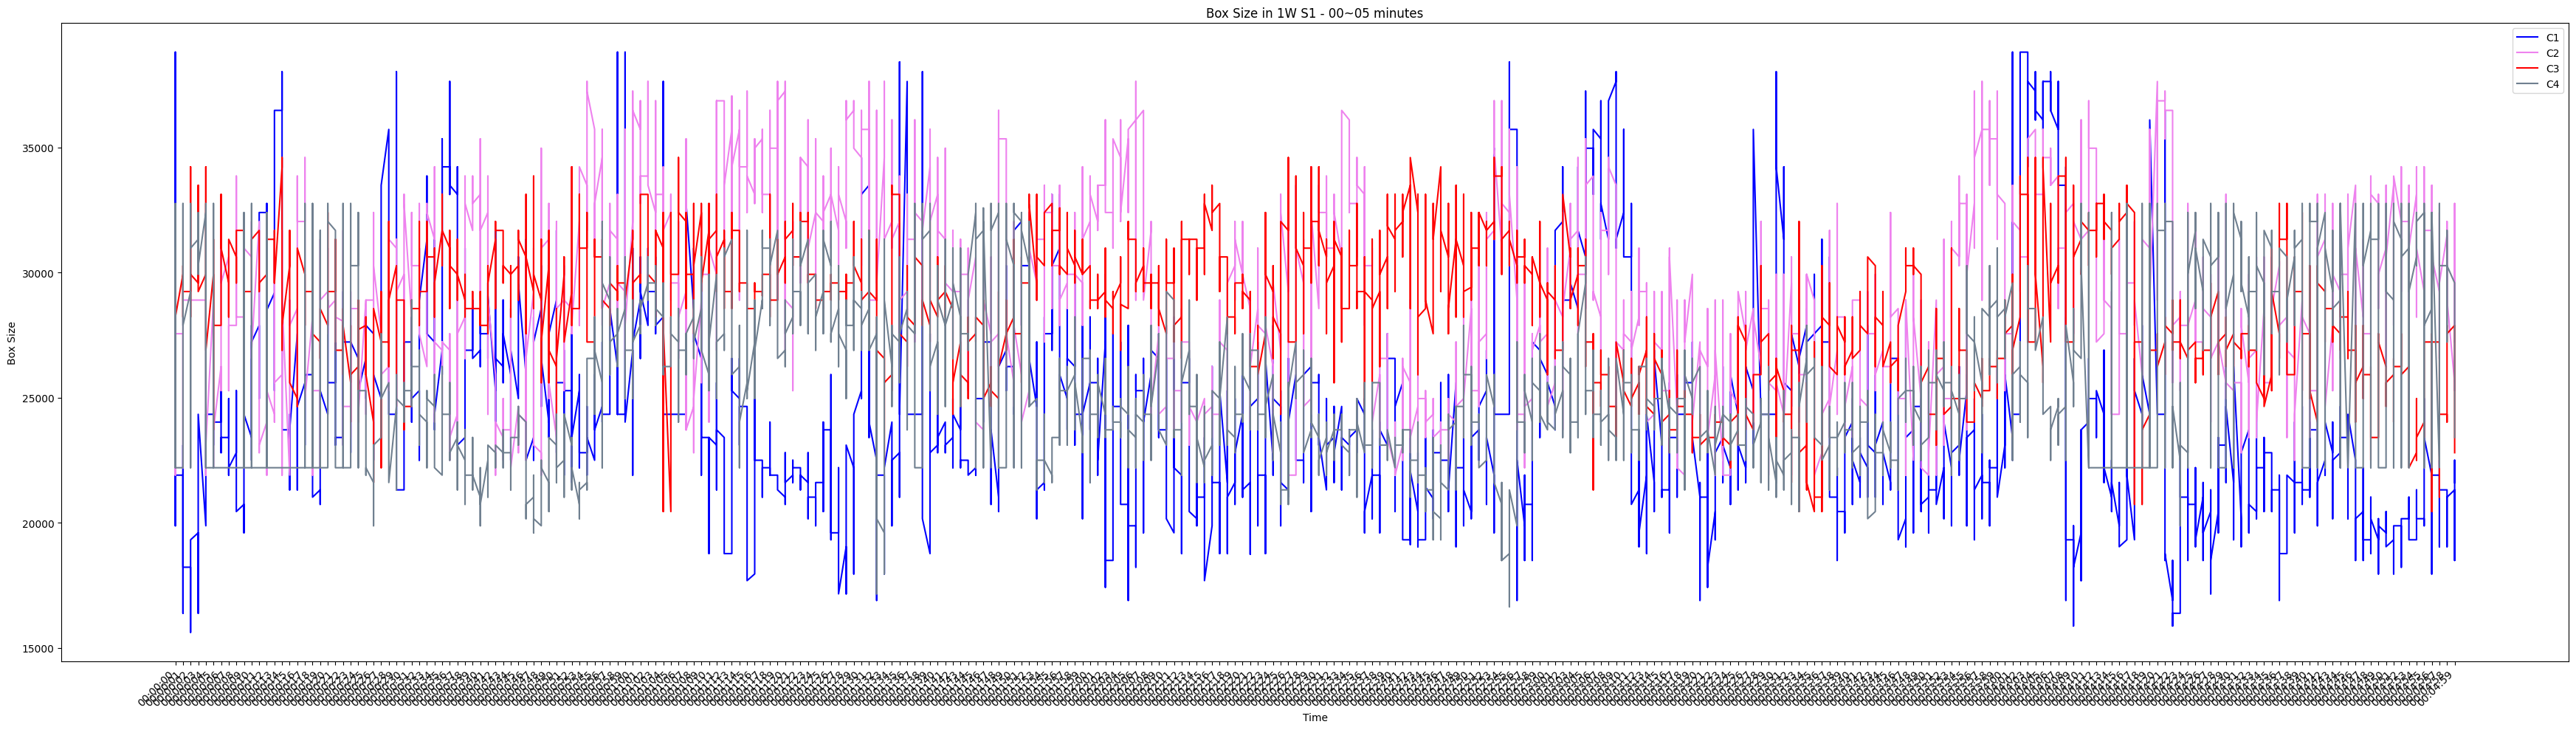

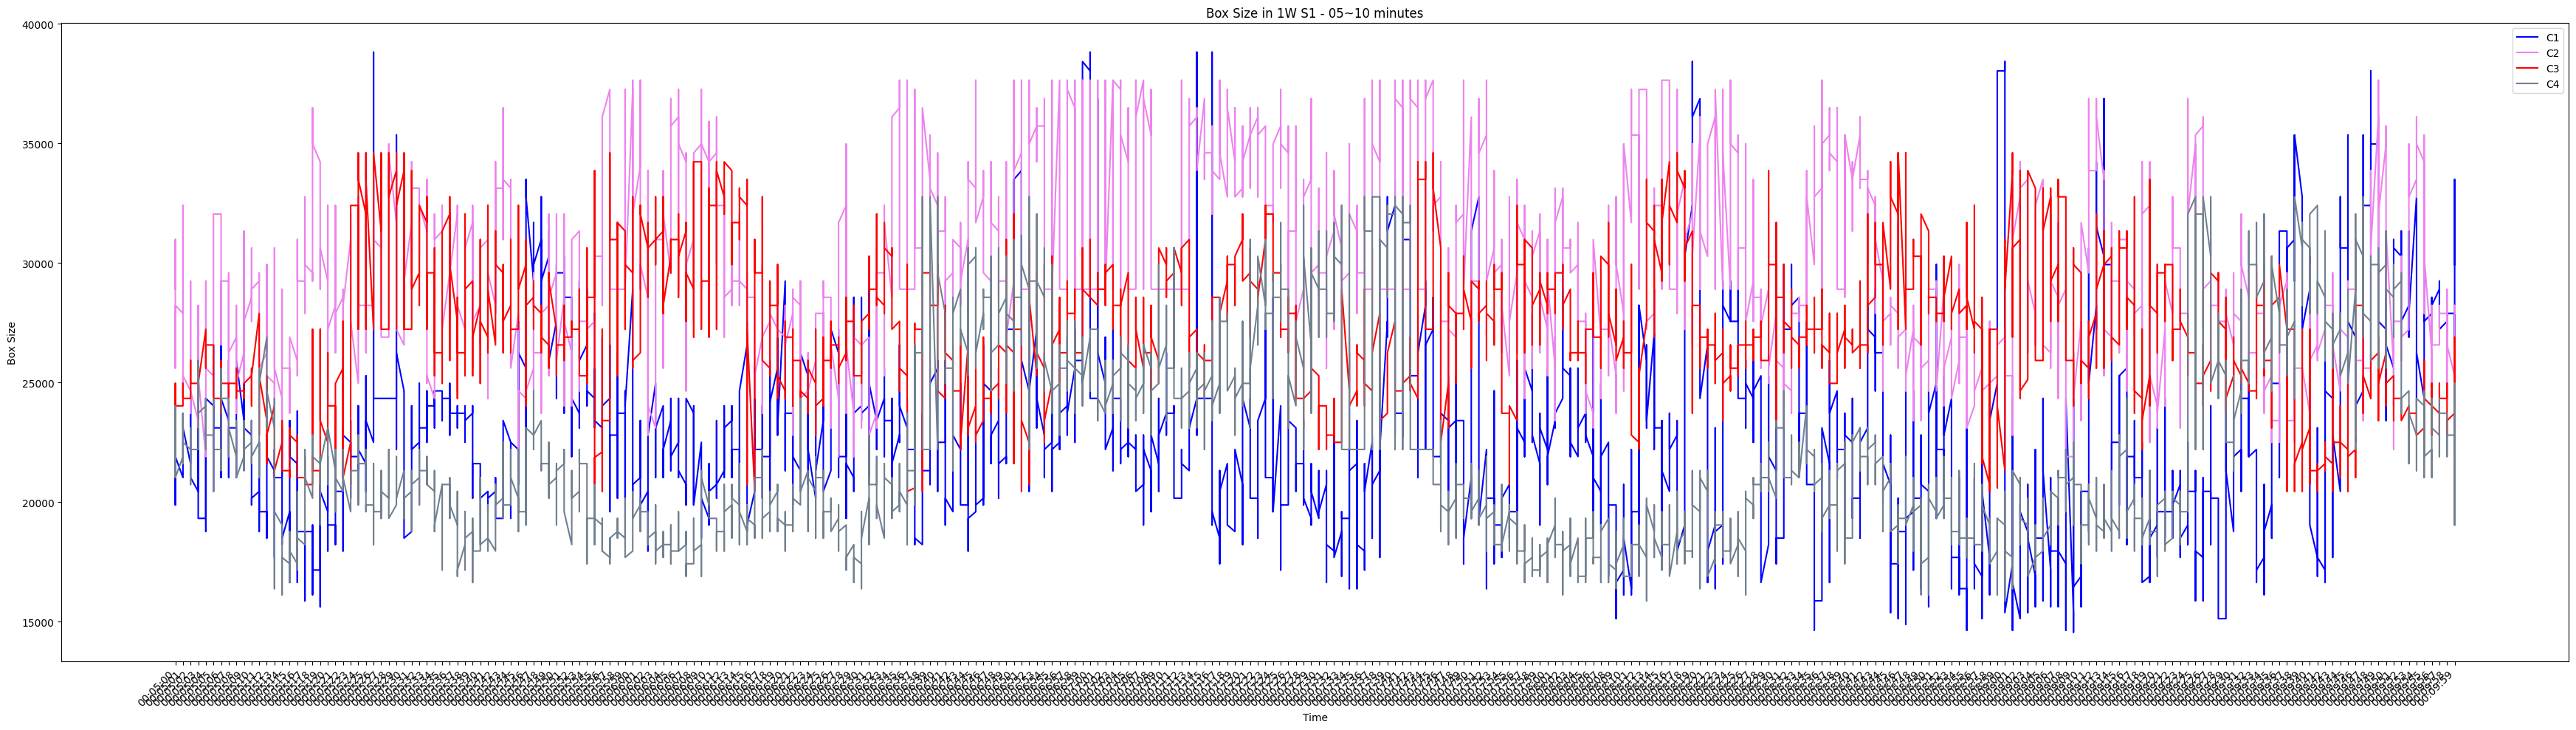

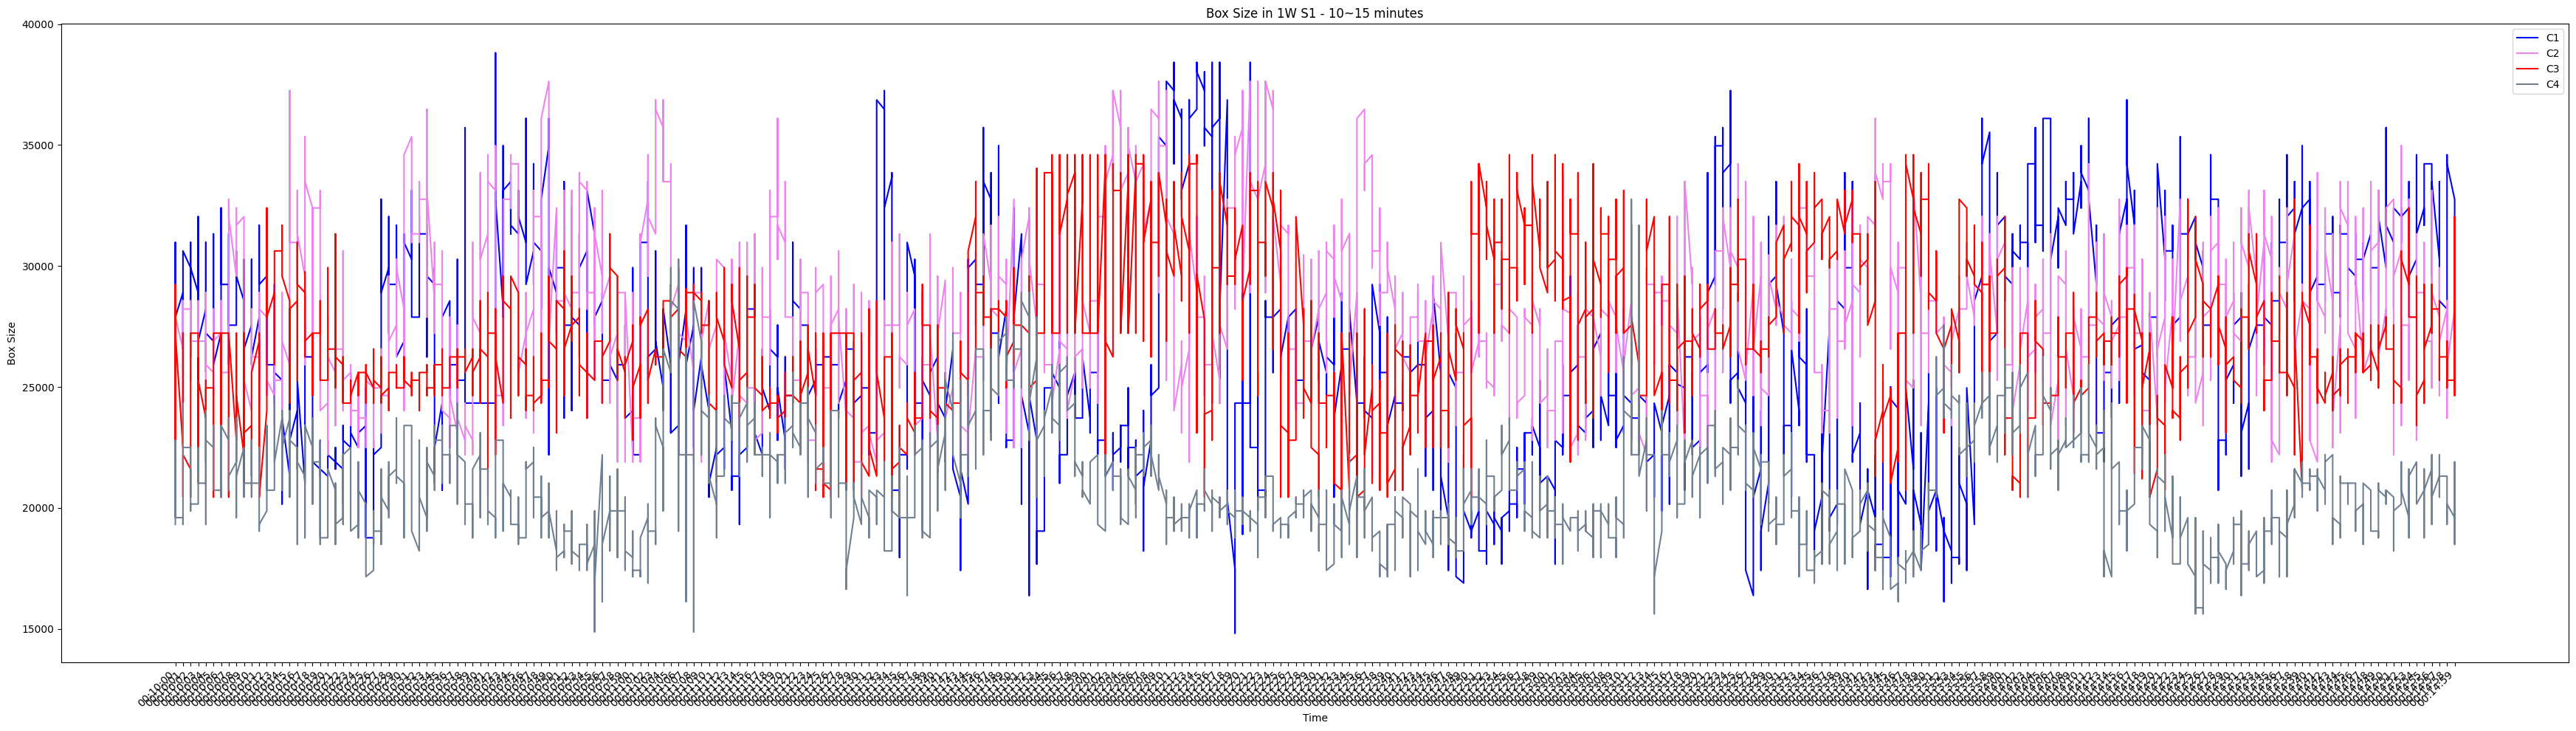

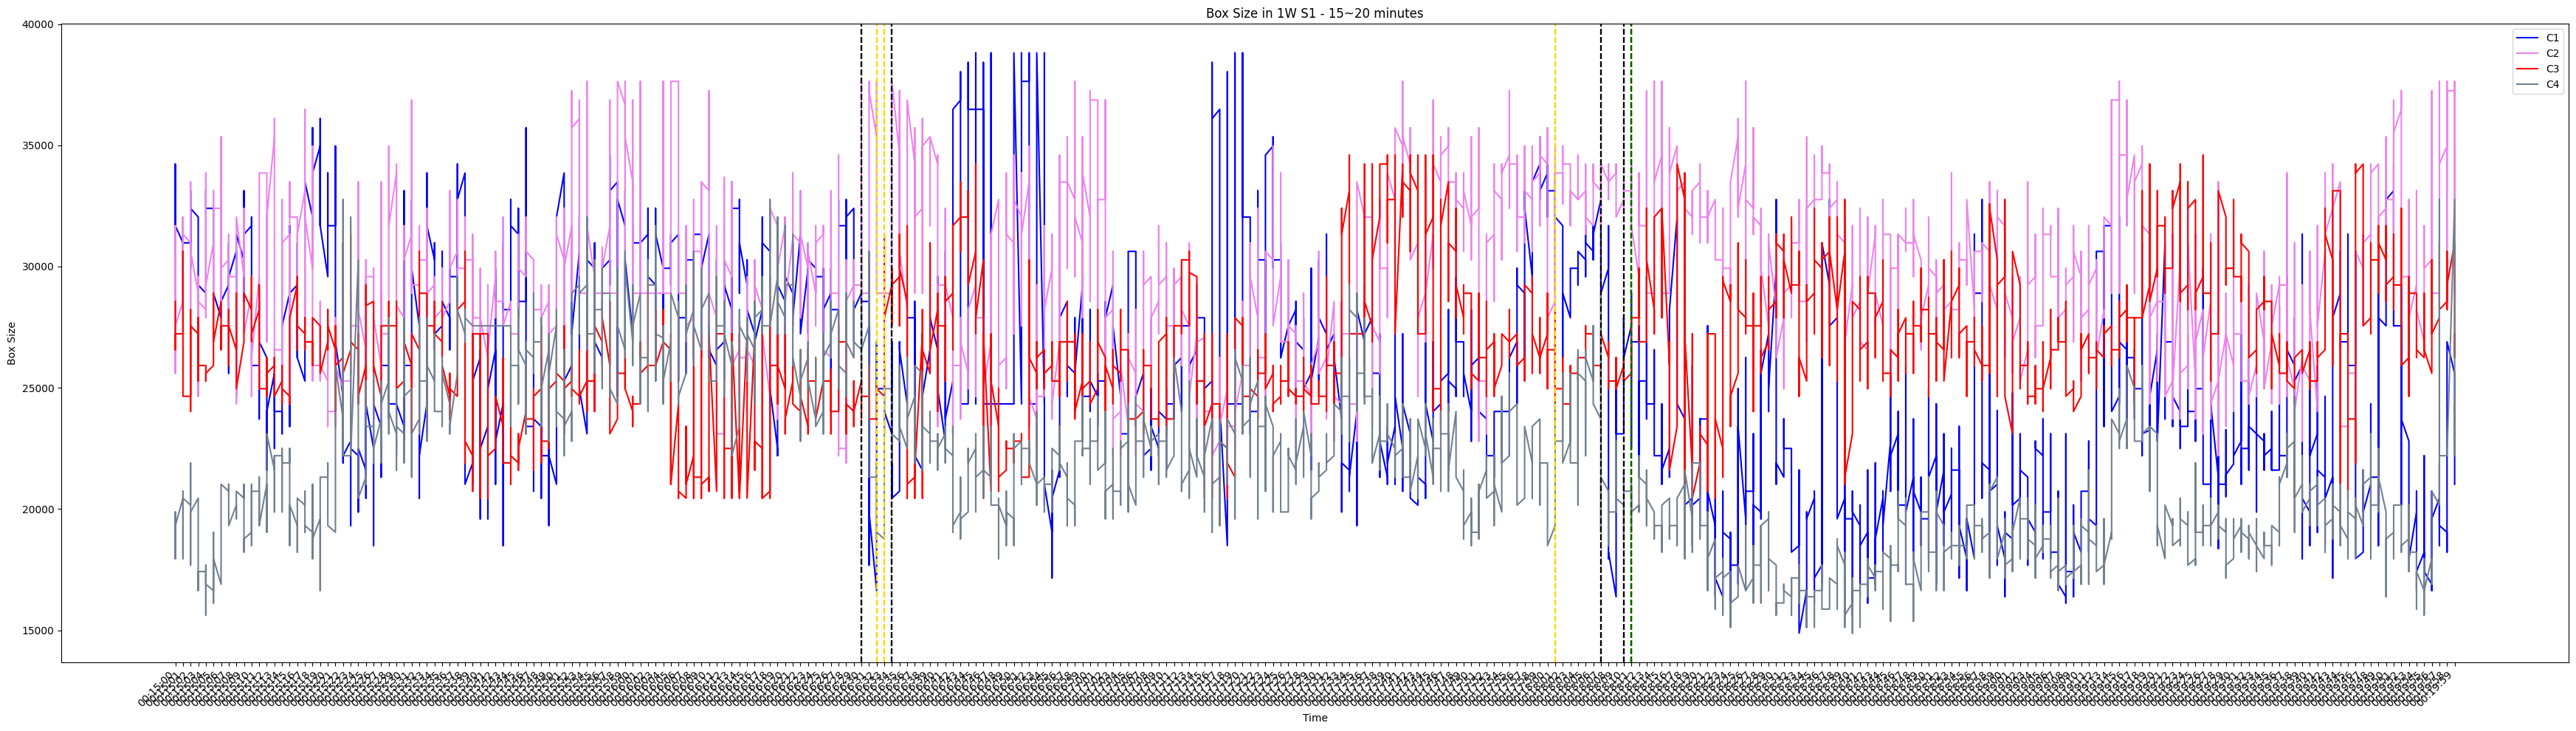

In [7]:
# https://gomming.tistory.com/61 (color)
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define paths
path = 'D:\\MultiModal\\Face_z_score\\C_result\\'
save_path = 'D:\\MultiModal\\Face_z_score\\result_1min_plot_C\\'
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Define lists
weeks = ['1W'] #  '2W', '3W', '4W'
steps = ['S1']
people = ['C1', 'C2', 'C3', 'C4']
colors = ['blue', 'violet', 'red', 'slategray']  # Different color for each person

# Define time ranges (in minutes)
time_ranges = [(0, 5), (5, 10), (10, 15), (15, 20)]

for week in weeks:
    for step in steps:
        for i, (start_minute, end_minute) in enumerate(time_ranges):
            plt.figure(figsize=(35, 10))
            plt.xlabel('Time')
            plt.ylabel('Box Size')
            plt.title(f'Box Size in {week} {step} - {start_minute:02d}~{end_minute:02d} minutes')
        
            for person, color in zip(people, colors):
                file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
                if os.path.exists(file_path):
                    df = pd.read_excel(file_path, index_col=0)
                    df['box.size'] = df['box.height'] * df['box.width']
                    df.index = pd.to_datetime(df.index, format='%H:%M:%S.%f')
                    
                    # Filter data within the current time range
                    df_filtered = df[(df.index.minute >= start_minute) & (df.index.minute < end_minute)]
                    
                    # Convert index to formatted string
                    x_labels = [idx.strftime('%H:%M:%S') for idx in df_filtered.index]
                    
                    plt.plot(x_labels, df_filtered['box.size'], label=f"{person}", color=color)
                    
                    
                    # 특정 조건일 때에만 라인을 그려줄 수 있도록 함. 
                    if (start_minute == 15 and end_minute == 20):
                        for t in ['00:16:32', '00:16:33', '00:18:01', '00:18:11']: # C1
                            plt.axvline(t, color='gold', linestyle='--')
                        for j in ['00:17:37', '00:17:39']: # C3
                            plt.axvline(t, color='darkgreen', linestyle='--')
                            
                    # Plot blue line at specific times
                    if (start_minute == 15 and end_minute == 20):
                        for t in ['00:16:30', '00:16:34', '00:18:07', '00:18:10']: # C4
                            plt.axvline(t, color='black', linestyle='--')
                    
                
            plt.legend()
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
